In [1]:
import os

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import dionysus as dion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from pt_activation.models.simple_mnist import CFF
import sklearn_tda as tda

%load_ext autoreload
%autoreload 2

Cython not found--SlicedWassersteinKernel, PersistenceWeightedGaussianKernel and PersistenceScaleSpaceKernel not available
Cython not found--WassersteinDistance and SlicedWassersteinDistance not available
Gudhi not found--GraphInducedComplex not available


In [43]:
def plot_diagram(d, n, i):

    ax = plt.subplot()
    diag = np.array([[pt.birth, pt.death] for pt in d])
    ax.scatter(diag[:,0], diag[:,1], s=25, c=(diag[:,0] - diag[:,1])**2, cmap=plt.cm.coolwarm, zorder=10)
    lims = [
        np.min(0),  # min of both axes
        np.max(1),  # max of both axes
    ]

    # now plot both limits against eachother

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel('Birth Time')
    plt.ylabel('Death Time')
    plt.title('Epoch {}'.format(i))
    
#     plt.show()

    plt.savefig(os.path.join(n, 'diagram_' + str(i) + '.png'), dpi=1200,
                            format='png', bbox_inches='tight')

    plt.close()
    plt.clf()
    plt.cla()
    
    
def persistence_score(d):
    diag = np.array([[pt.birth,pt.death] for pt in d])
    diag = diag[~np.isinf(diag[:,1])]
    return np.average(diag[:,0] - diag[:,1])

In [42]:
diagram_directory = '/home/tgebhart/projects/pt_activation/logdir/diagrams/train_homology_cff_5-filters_5-kernel_size_50-fc1_relu-activation.pkl'

In [4]:
df = pd.read_pickle(diagram_directory)

In [5]:
df.head()

,accuracy,diagrams,epoch,loss
0,92.52,"[((0.463372,inf), (0.463372,0.436716), (0.4633...",1,0.253607
1,95.23,"[((0.520874,inf), (0.520874,0.49176), (0.52087...",2,0.161804
2,96.11,"[((0.541316,inf), (0.541316,0.509484), (0.5413...",3,0.131134
3,97.00,"[((0.549576,inf), (0.549576,0.517909), (0.5495...",4,0.098949
4,97.47,"[((0.55736,inf), (0.55736,0.524924), (0.55736,...",5,0.086538


[Diagram with 91 points, Diagram with 55471 points]
[Diagram with 105 points, Diagram with 60762 points]


/home/tgebhart/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[Diagram with 184 points, Diagram with 80080 points]
[Diagram with 124 points, Diagram with 60752 points]
[Diagram with 74 points, Diagram with 48341 points]
[Diagram with 157 points, Diagram with 71741 points]
[Diagram with 113 points, Diagram with 61117 points]
[Diagram with 165 points, Diagram with 73983 points]
[Diagram with 63 points, Diagram with 47230 points]
[Diagram with 117 points, Diagram with 60145 points]
[Diagram with 116 points, Diagram with 59333 points]
[Diagram with 183 points, Diagram with 76124 points]
[Diagram with 199 points, Diagram with 79206 points]
[Diagram with 157 points, Diagram with 73842 points]
[Diagram with 119 points, Diagram with 59691 points]
[Diagram with 157 points, Diagram with 72080 points]
[Diagram with 176 points, Diagram with 82581 points]
[Diagram with 158 points, Diagram with 73692 points]
[Diagram with 157 points, Diagram with 69076 points]
[Diagram with 161 points, Diagram with 68451 points]
[Diagram with 103 points, Diagram with 57912 poi

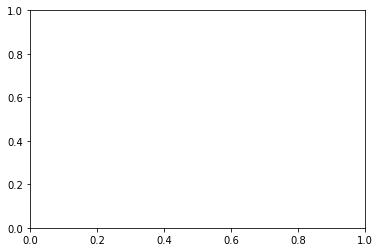

In [6]:
save_loc = '/home/tgebhart/projects/pt_activation/logdir/diagrams/training'
for i in range(df.shape[0]):
    print(df['diagrams'].iloc[i])
    plot_diagram(df['diagrams'].iloc[i][0], save_loc, df['epoch'].iloc[i])

In [45]:
scores = []
for i in range(df.shape[0]):
    scores.append(persistence_score(df['diagrams'].iloc[i][0]))

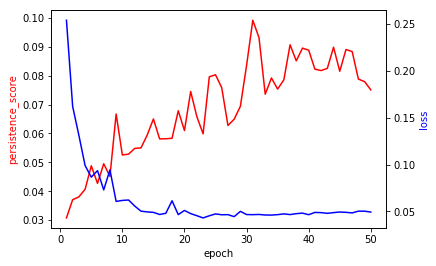

In [46]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('persistence_score', color=color)
ax1.plot(df['epoch'], scores, color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('loss', color=color)  # we already handled the x-label with ax1
ax2.plot(df['epoch'], df['loss'], color=color)


In [56]:
LS = tda.Landscape(resolution = 100, num_landscapes=10)
diag = df['diagrams'].iloc[5][0]
diags = np.array([[pt.death,pt.birth] for pt in diag])
diags[np.isinf(diags)] = np.partition(diags.flatten(), -2)[-2]
L = LS.fit_transform([diags])
L.shape

(1, 1000)

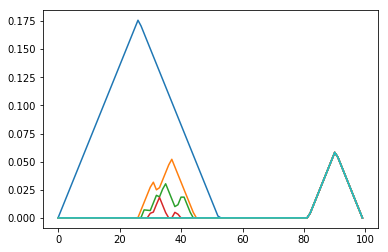

In [57]:
by = 100
for i in range(0,L.shape[1],by):
    plt.plot(L[0][i:i+by])
plt.show()

In [58]:
L[0]

array([0.00000000e+00, 6.75634172e-03, 1.35126834e-02, 2.02690252e-02,
       2.70253669e-02, 3.37817086e-02, 4.05380503e-02, 4.72943920e-02,
       5.40507337e-02, 6.08070755e-02, 6.75634172e-02, 7.43197589e-02,
       8.10761006e-02, 8.78324423e-02, 9.45887840e-02, 1.01345126e-01,
       1.08101467e-01, 1.14857809e-01, 1.21614151e-01, 1.28370493e-01,
       1.35126834e-01, 1.41883176e-01, 1.48639518e-01, 1.55395859e-01,
       1.62152201e-01, 1.68908543e-01, 1.75664885e-01, 1.70581526e-01,
       1.63825184e-01, 1.57068843e-01, 1.50312501e-01, 1.43556159e-01,
       1.36799818e-01, 1.30043476e-01, 1.23287134e-01, 1.16530792e-01,
       1.09774451e-01, 1.03018109e-01, 9.62617673e-02, 8.95054256e-02,
       8.27490839e-02, 7.59927422e-02, 6.92364005e-02, 6.24800587e-02,
       5.57237170e-02, 4.89673753e-02, 4.22110336e-02, 3.54546919e-02,
       2.86983502e-02, 2.19420084e-02, 1.51856667e-02, 8.42932500e-03,
       1.67298328e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [37]:
L[0][:1000].max()

0.27379082442865554